# **Q1. Problem Statement: Decision Tree Using the CART Algorithm**

You are given a dataset,“car_evaluation.csv.”Load the dataset into a DataFrame without the header and rename the columns as the list given here -['buying',  'maint',  'doors',  'persons',  'lug_boot', 'safety',  'class']. Considering  the classcolumn  as  the  target variable,

 perform the following tasks:

1.Explore the target column,class(our task is to predict how the car features  affectthe  class  of  car  asVery  good,  Good,  Acceptable,  or  Unacceptable, whichis why we have considered this column as the target column)

2.Declare feature vectors and the target variable

3.Split the data into test and train fragments using the train_test_split()function in an 80:20 ratio (80% trainand20% test)

4.Encode all     the     ordinal     data     into     numeric     values     using     the category_encoderslibrary

5.Predicting the test results using a Decision Tree Classifier based on Gini Index criteria

6.Check the accuracy score of the model based on the Gini Index

7.Visualize the decision tree using Graphviz8.Show how the importance of features affects the target variable

#**STEP 1:**
Importing necessary libraries

In [571]:
import numpy as np
import pandas as pd
!pip install graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
!pip install category_encoders
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO
from sklearn import tree

#**STEP 2:**
Load the file or dataset

In [572]:
car_df = pd.read_csv("/content/sample_data/car_evaluation.csv")

In [573]:
car_df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


#**STEP 3:**
rename the features

In [574]:
#['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
name_change = {"vhigh":'buying',"vhigh.1":'maintenance',"2":"doors","2.1":"persons","small":"lug_boot","low":"safety",
              "unacc":"class" }
car_df = car_df.rename(name_change, axis = 1)

In [575]:
car_df.head()


,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


#**STEP 4:**
check any null values present in the dataset

In [576]:
car_df.isna().sum()

buying         0
maintenance    0
doors          0
persons        0
lug_boot       0
safety         0
class          0
dtype: int64

#**STEP 5:**
Data information

In [577]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#**STEP 6:**
Splitting the data into the train and test. The target variable is class

In [578]:
X = car_df.drop("class", axis = 1)
y = car_df["class"]
print("Target column is:","\n", y.value_counts())

Target column is: 
 unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [579]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 10 )


In [580]:
print("x-train shape is: ",X_train.shape)
print("x-test shape is: ",X_test.shape)
print("y-train shape is: ",y_train.shape)
print("x-test shape is: ",y_test.shape)

x-train shape is:  (1381, 6)
x-test shape is:  (346, 6)
y-train shape is:  (1381,)
x-test shape is:  (346,)


In [581]:
car_df.columns

Index(['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety',
       'class'],
      dtype='object')

#**STEP 7:**
Category ordinal value converted into the numerical value

In [582]:
encoder = ce.OrdinalEncoder(['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety','class'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,buying,maintenance,doors,persons,lug_boot,safety
153,1,1,1,1,1,1
1332,2,2,1,2,1,1
1399,2,2,2,1,2,2
703,3,3,3,3,1,2
1416,2,1,4,2,2,1


In [583]:
X_test.head()

,buying,maintenance,doors,persons,lug_boot,safety
954,4,2,2,2,1,1
115,1,1,4,3,3,2
1463,2,1,3,3,3,3
35,1,2,1,2,1,3
1625,2,4,4,3,3,3


#**STEP 8:**
Evaluating the model using the algorithm DecisionTreeClassifier

In [584]:
model = DecisionTreeClassifier(criterion = "gini", max_features = 3, max_depth = 3,random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, random_state=0)

In [585]:
y_pred = model.predict(X_test)
y_pred

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 

#**STEP 9:**
find the accuracy score level

In [586]:
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy score with  criterion gini index: {0:0.4f}".format(accuracy))

Model accuracy score with  criterion gini index: 0.8121


#**STEP 10:**
Graphiz the data into decision tree format to anlaysis

In [587]:
graph_data  = tree.export_graphviz(model, out_file = None, filled = True, special_characters=True, feature_names=list(X_train.columns),
                               class_names=y_train, rounded = True)


In [588]:
graph = graphviz.Source(graph_data)

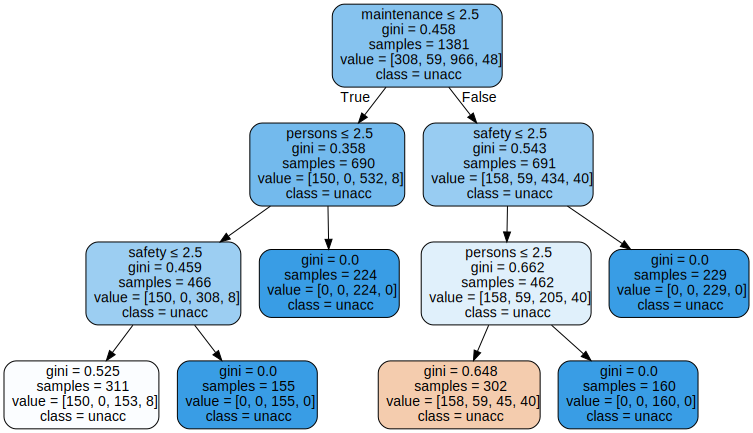

In [589]:
graph